<a href="https://colab.research.google.com/github/nlei1/nlp-notebooks/blob/main/gpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install transformers datasets
from transformers import GPT2Tokenizer, GPT2Model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2Model.from_pretrained('gpt2')
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

     |████████████████████████████████| 3.4 MB 7.5 MB/s 
     |████████████████████████████████| 306 kB 53.7 MB/s 
     |████████████████████████████████| 3.3 MB 52.6 MB/s 
     |████████████████████████████████| 596 kB 57.3 MB/s 
     |████████████████████████████████| 895 kB 50.5 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 243 kB 50.7 MB/s 
     |████████████████████████████████| 1.1 MB 66.3 MB/s 
     |████████████████████████████████| 133 kB 72.5 MB/s 
     |████████████████████████████████| 271 kB 72.5 MB/s 
     |████████████████████████████████| 160 kB 68.6 MB/s 
     |████████████████████████████████| 192 kB 67.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

In [3]:
import numpy as np, pandas as pd 
import os
import zipfile
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
import gensim
import gensim.downloader as api
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

In [59]:
url = 'https://raw.githubusercontent.com/nlei1/csvs-for-proj/main/noi.csv'
drugs = pd.read_csv(url, error_bad_lines=False)

In [60]:
drugs

,names
0,Zolpidem
1,Eszopiclone
2,Zaleplon
3,Trazodone
4,Amitriptyline
5,Mirtazapine
6,Doxepin
7,Lorazepam
8,Clonazepam
9,Temazepam


In [5]:
text = "trazodone"
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

BaseModelOutputWithPastAndCrossAttentions([('last_hidden_state',
                                            tensor([[[-0.1174, -0.0929, -0.2461,  ..., -0.1702, -0.0123,  0.0120],
                                                     [-0.3740, -0.3640, -0.2554,  ...,  0.5111, -0.7928, -0.0920],
                                                     [-0.1205, -0.5866, -0.7777,  ...,  0.4757, -0.0526, -0.4763],
                                                     [-0.8975, -0.7708, -0.4174,  ...,  0.0957,  0.0952,  0.3439]]],
                                                   grad_fn=<ViewBackward0>)),
                                           ('past_key_values',
                                            ((tensor([[[[-1.6533e+00,  2.0032e+00,  1.0456e+00,  ..., -1.2099e+00,
                                                         -4.4284e-01,  1.7855e+00],
                                                        [-4.1325e-01,  2.8944e+00,  1.4845e+00,  ...,  4.4327e-02,
                  

In [10]:
output[0][0]

tensor([[-0.1174, -0.0929, -0.2461,  ..., -0.1702, -0.0123,  0.0120],
        [-0.3740, -0.3640, -0.2554,  ...,  0.5111, -0.7928, -0.0920],
        [-0.1205, -0.5866, -0.7777,  ...,  0.4757, -0.0526, -0.4763],
        [-0.8975, -0.7708, -0.4174,  ...,  0.0957,  0.0952,  0.3439]],
       grad_fn=<SelectBackward0>)

In [14]:
tmp = torch.cat((output[0][0][0], output[0][0][1], output[0][0][2], output[0][0][3]))
tmp

tensor([-0.1174, -0.0929, -0.2461,  ...,  0.0957,  0.0952,  0.3439],
       grad_fn=<CatBackward0>)

In [64]:
def embed_text(text):
  text_index = tokenizer.encode(text,add_prefix_space=True)
  vector = model.wte.weight[text_index,:]
  return vector[0]

def get_embeddings(to_embed):
  embeddings = []
  for item in to_embed:
    t= embed_text(item)
    embeddings.append(np.array(t.detach().numpy().tolist()))
  return embeddings

def get_pca(embeddings):
  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(embeddings)
  post_pca = pd.DataFrame(pca_result, columns = ['x','y'])
  return post_pca

def get_tsne(embeddings, p_perplexity=1, p_n_iter=1500):
  tsne = TSNE(n_components=2, perplexity=p_perplexity, n_iter=p_n_iter)
  tsne_result = tsne.fit_transform(embeddings)
  post_tsne = pd.DataFrame(tsne_result, columns = ['x','y'])
  return post_tsne

def plot_with_labels(post_reduction):
  post_reduction_annotated = post_reduction.join(pd.DataFrame(drugs, columns=['names']))
  ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10))
  post_reduction_annotated[['x','y','names']].apply(lambda x: ax.text(*x),axis=1)

In [66]:
embeddings = get_embeddings(drugs['names'])

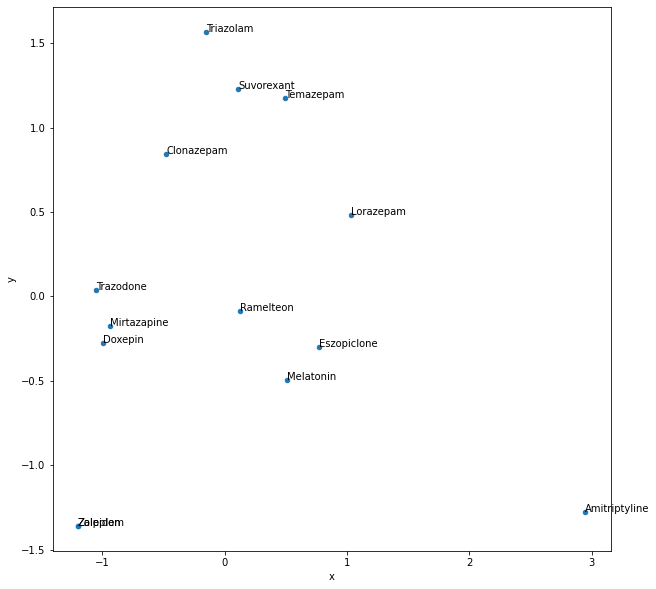

In [67]:
plot_with_labels(get_pca(embeddings))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


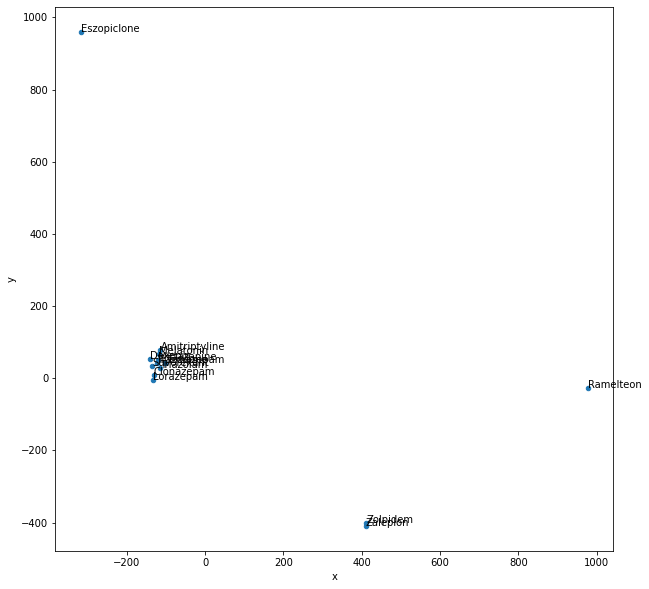

In [68]:
plot_with_labels(get_tsne(embeddings, p_perplexity=1, p_n_iter=1600))